<div class="frontmatter text-center">
<h1>Geospatial Data Science</h1>
<h2>Lecture 2: Geospatial Data in Python</h2>
<h3>IT University of Copenhagen, Spring 2022</h3>
<h3>Instructor: Michael Szell</h3>
</div>

# Source
This notebook was adapted from:
* A course on Geographic Data Science: https://darribas.org/gds_course/content/bC/lab_C.html
* Automating GIS-Processes: https://autogis-site.readthedocs.io/en/latest/notebooks/L2/02-projections.html

# PART 1: Data Inspection

## Imports

In [1]:
import geopandas as gpd # for geospatial data handling
import osmnx # for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting

In [2]:
osmnx.config(
    overpass_settings='[out:json][timeout:90][date:"2020-09-07T00:00:00Z"]'
)

在本文中，我们将学习如何加载、操作和可视化空间数据。从某种意义上说，空间数据通常只是作为表中的“多一列”包含在内。但是，*空间有时是特殊的*，地理数据与标准数字表的区别很少。在Python中处理空间数据在很大程度上类似于处理非空间数据。

## GeoPandas介绍

有各种不同的 GIS 数据格式可用，例如 [Shapefile](https://en.wikipedia.org/wiki/Shapefile), [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON), [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language), 和 [GPKG](https://en.wikipedia.org/wiki/GeoPackage). [Geopandas](https://geopandas.org/en/stable/docs/user_guide/io.html) 能够从所有这些格式（以及更多格式）读取数据，它将数据分析库 [pandas](https://pandas.pydata.org/pandas-docs/stable/) 的功能与其他软件包（如 [shapely](https://shapely.readthedocs.io/en/stable/manual.html) 和 [fiona](https://fiona.readthedocs.io/en/latest/manual.html) 相结合，用于管理空间数据。

Geopandas中的主要数据结构是`GeoSeries`和`GeoDataFrame`，它们扩展了pandas的`Series`和`DataFrames`功能。这意味着我们在与pandas一起工作时也可以使用我们所有的pandas技能！

地理数据帧和pandas数据帧之间的主要区别在于 [geodataframe](https://geopandas.org/en/stable/docs/user_guide/data_structures.html#geodataframe)应包含一列几何。默认情况下，此列的名称为`几何`。几何列是一个 [geoseries](https://geopandas.org/en/stable/docs/user_guide/data_structures.html#geoseries)，其中包含几何（点、线、多边形、多多边形等）作为形状对象。更多信息在这里： https://geopandas.org/en/stable/getting_started/introduction.html

<img src="files/dataframe.svg">

## 数据集

为了学习这些概念，我们将使用三个主要数据集：: Cities, streets, 和 bars in Spain. 这些数据集可以从 Web 或您的计算机动态加载。

### Cities

首先，我们将使用多边形对象。我们将使用包含西班牙城市边界的开放数据集。我们可以通过以下方式将其读入名为`cities`的对象中： 

In [3]:
cities = gpd.read_file("https://ndownloader.figshare.com/files/20232174")

上面的代码单元格需要互联网连接。如果您不在线，则可以使用以下代码行从计算机读取数据：

In [4]:
cities = gpd.read_file("files/cities.gpkg")

---

### Streets

查看有关该项目的更多信息，包括交互式地图：[https://geochicasosm.github.io/lascallesdelasmujeres/](https://geochicasosm.github.io/lascallesdelasmujeres/)

除了多边形之外，我们还将使用线图层。为此，我们将使用来自西班牙马德里市的街道网络子集。

数据可在以下网址获得：

In [5]:
url = (
    "https://github.com/geochicasosm/lascallesdelasmujeres"
    "/raw/master/data/madrid/final_tile.geojson"
)
url

'https://github.com/geochicasosm/lascallesdelasmujeres/raw/master/data/madrid/final_tile.geojson'

你可以用以下方法将其读入名为`streets`的对象中：

In [7]:
streets = gpd.read_file(url)

---

上面的代码单元格需要互联网连接。如果您不在线，则可以使用以下代码行从计算机读取数据：

In [10]:
streets = gpd.read_file("files/streets.geojson")

---

### Bars

我们将依赖的最后一个数据集是一组点，用于划分马德里条形图的位置。为了获得它，我们将使用`osmnx`，一个允许我们查询[OpenStreetMap](https://www.openstreetmap.org)的Python库。请注意，我们使用方法`pois_from_place`，该方法查询特定地点（本例中为马德里）的兴趣点（POI或`pois`）。此外，我们可以指定一组标签来分隔查询。我们使用它来询问_仅_ `bar`类型的便利设施：

In [13]:
pois = osmnx.geometries_from_place(
    "Madrid, Spain", tags={"amenity": "bar"}
)

d:\work\miniconda3\envs\ox\Lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
d:\work\miniconda3\envs\ox\Lib\site-packages\osmnx\utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
d:\work\miniconda3\envs\ox\Lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


此时你不需要知道当我们运行`geometries_from_place`时幕后发生了什么，但是，如果你好奇，我们正在对[OpenStreetMap](https://www.openstreetmap.org)进行查询（几乎就像你在谷歌地图中输入“西班牙马德里的酒吧”一样）并得到响应作为数据表，而不是作为一个带有交互式地图的网站。很酷吧？

---

## 检查空间数据

从文件到快速可视化数据的最直接方法是将其加载为`GeoDataFrame`并调用`plot`命令。

在两行代码中，我们将获得文件中包含的空间数据的图形表示，该文件可以采用多种格式;实际上，由于它在引擎盖下使用相同的驱动程序，因此您可以加载与 QGIS 等桌面 GIS 包允许的几乎相同的矢量文件。让我们从以粗略但快速的形式绘制单个图层开始，稍后我们将在绘图中构建风格和复杂性。

### Polygons

现在，`cities`是一个`GeoDataFrame`。与传统的非空间`DataFrame`非常相似，但具有一个名为`geometry`的附加列：

In [9]:
cities.head()

city_id  n_buildings                                           geometry
0   ci000         2348  POLYGON ((385390.071 4202949.446, 384488.697 4...
1   ci001         2741  POLYGON ((214893.033 4579137.558, 215258.185 4...
2   ci002         5472  POLYGON ((690674.281 4182188.538, 691047.526 4...
3   ci003        14608  POLYGON ((513378.282 4072327.639, 513408.853 4...
4   ci004         2324  POLYGON ((206989.081 4129478.031, 207275.702 4...

这使我们能够通过执行以下行来快速生成绘图：

<AxesSubplot: >

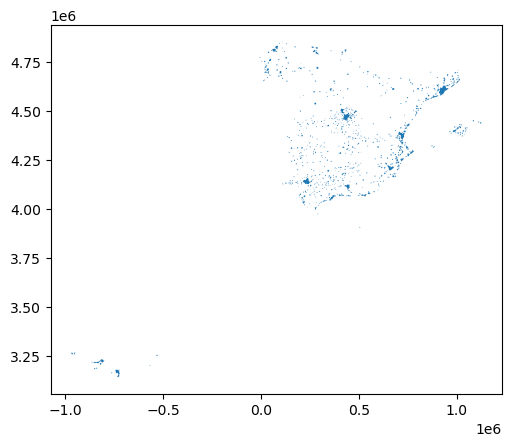

In [ ]:
cities.plot()

这可能不是城市最美观的视觉表现形式，但很难说它制作起来并不快。稍后我们将致力于样式设置和自定义空间图。

**Pro-tip**: 如果您调用``列的单行，它将返回一个形状的小图：

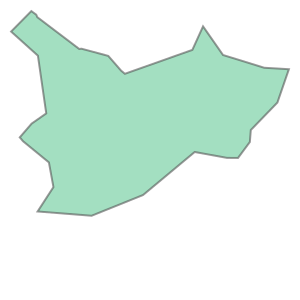

In [ ]:
cities.loc[0, 'geometry']

### Lines

与多边形情况类似，如果我们选择带有线条的表格的`geometry`列，则单行也将显示几何图形：

In [ ]:
streets.head()

name         id wikipedia_link  gender  \
0           Plaza Virgen de la Capilla  123483746                 Female   
1       Plaza Nuestra Señora del Prado  123483930                 Female   
2    Avenida del Cardenal Herrera Oria    4272448                   Male   
3  Glorieta de Mariano Salvador Maella    4292687                   Male   
4                  Calle de Pedro Rico    4292689                   Male   

  scale category typeofroad                                           geometry  
0              -          -  POLYGON ((-3.71472 40.48250, -3.71460 40.48229...  
1              -          -  POLYGON ((-3.71404 40.48271, -3.71392 40.48249...  
2           None       None  LINESTRING (-3.71421 40.48307, -3.71407 40.483...  
3           None       None  LINESTRING (-3.71660 40.47909, -3.71665 40.479...  
4           None       None  LINESTRING (-3.70463 40.48167, -3.70441 40.481...

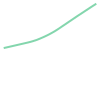

In [ ]:
streets.loc[2, 'geometry']

快速绘图同样由以下方式生成：

<AxesSubplot: >

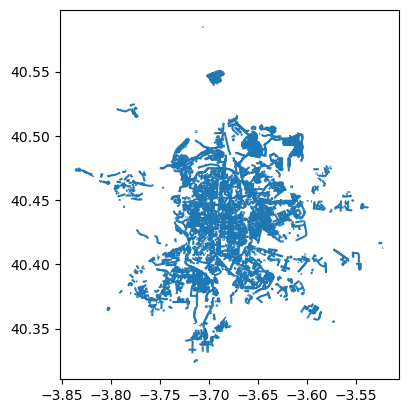

In [ ]:
streets.plot()

同样，这可能不是显示街道的最漂亮方式，您可能需要更改一些参数，例如颜色等。正如我们将在下面看到的，所有这些都是可能的，但这让我们可以快速检查线条的外观。

### Points

点采用类似的方法进行快速绘制：

In [ ]:
pois.head()

unique_id      osmid element_type addr:city addr:housenumber  \
0   node/26808561   26808561         node    Madrid                2   
1   node/43274445   43274445         node       NaN              NaN   
2   node/47216276   47216276         node       NaN              NaN   
3  node/167301896  167301896         node       NaN              NaN   
4  node/167301964  167301964         node       NaN              NaN   

  addr:postcode               addr:street amenity             email  \
0         28015  Plaza de Cristino Martos     bar  hola@murcafe.com   
1           NaN                       NaN     bar               NaN   
2           NaN                       NaN     bar               NaN   
3           NaN                       NaN     bar               NaN   
4           NaN                       NaN     bar               NaN   

                 name  ... payment:cash payment:credit_cards start_date  \
0            Mür Café  ...          NaN                  NaN        NaN   
1  Cadillac Solitario  ...          NaN                  NaN        NaN   
2         Bar Barocco  ...          NaN                  NaN        NaN   
3                 Bar  ...          NaN                  NaN        NaN   
4                 NaN  ...          NaN                  NaN        NaN   

  air_conditioning nodes building building:levels source:date barrier level  
0              NaN   NaN      NaN             NaN         NaN     NaN   NaN  
1              NaN   NaN      NaN             NaN         NaN     NaN   NaN  
2              NaN   NaN      NaN             NaN         NaN     NaN   NaN  
3              NaN   NaN      NaN             NaN         NaN     NaN   NaN  
4              NaN   NaN      NaN             NaN         NaN     NaN   NaN  

[5 rows x 82 columns]

<AxesSubplot: >

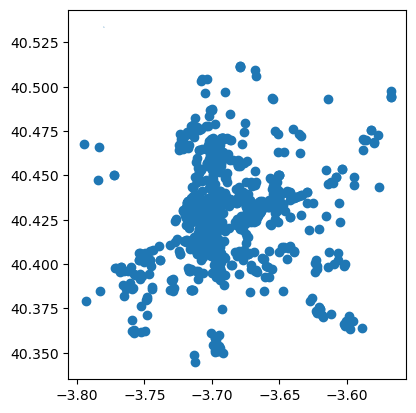

In [ ]:
pois.plot()

## Styling plots

可以调整绘图的多个方面以自定义特定需求。在本节中，我们将探讨一些基本元素，这些元素将使我们能够获得更引人注目的地图。

**NOTE**: 其中一些变化非常简单，而另一些则更加复杂，需要修补绘图的内部部分。它们不一定通过增加复杂性级别来组织。

### 改变透明度

多边形的颜色强度可以通过图中的`alpha`属性轻松更改。这被指定为介于 0 和 1 之间的值，其中前者是完全透明的，而后者是完全不透明的（最大强度）：

<AxesSubplot: >

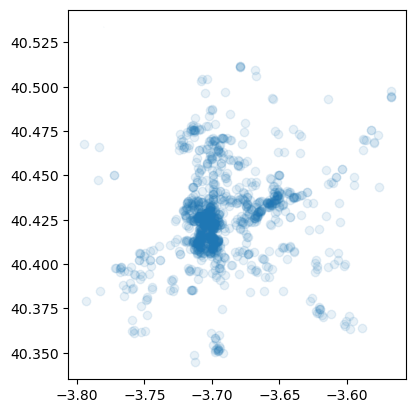

In [ ]:
pois.plot(alpha=0.1)

### 移除轴

尽管在某些情况下，轴对于获取上下文很有用，但大多数情况下，如果没有它们，地图的外观和感觉会更好。删除轴涉及将绘图包装成一个图形，这需要更多行无用的代码，但随着时间的推移，它将允许您进一步调整地图并创建更灵活的设计：

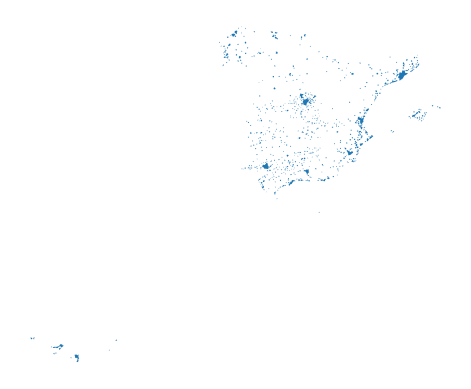

In [ ]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Plot layer of polygons on the axis
cities.plot(ax=ax)
# Remove axis frames
ax.set_axis_off()
# Display
plt.show()

让我们停下来研究一下前面的每一行：

1. 我们首先使用命令`plt.subplots`（我们在笔记本顶部导入的库`matplotlib`的一部分）创建了一个名为`f`的图形，其中一个名为`ax`的轴。请注意该方法如何返回两个元素，我们可以将它们中的每一个分配给具有不同名称（`f`和`ax`）的对象，只需将它们列在行的前面，用逗号分隔。
1. 其次，我们像以前一样绘制地理，但这次我们告诉函数我们希望它在我们正在传递的轴上绘制多边形，`ax`。此方法返回包含地理位置的轴，因此我们确保将其存储在具有相同名称的对象 `ax` 上。
1.在第三行，我们有效地删除了带有坐标的框。
1. 最后，我们通过调用 `plt.show（）`来绘制整个情节。

### 添加标题

添加标题是额外的一行，如果我们像刚才所做的那样在图形中创建情节。要在图的顶部包含文本：

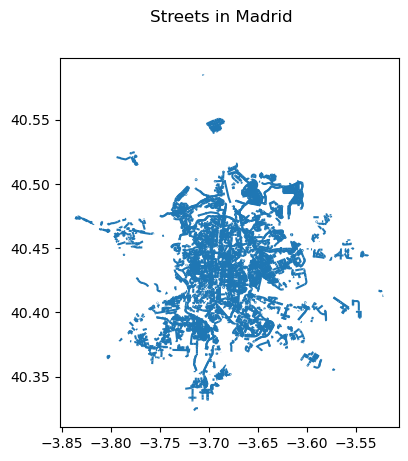

In [ ]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add layer of polygons on the axis
streets.plot(ax=ax)
# Add figure title
f.suptitle("Streets in Madrid")
# Display
plt.show()

### 更改地图的大小

在这种情况下，情节的大小同样容易改变。唯一的区别是，它是在创建带有参数`figsize`的图形时指定的。第一个数字表示宽度，即 X 轴，第二个数字对应于高度，即 Y 轴。

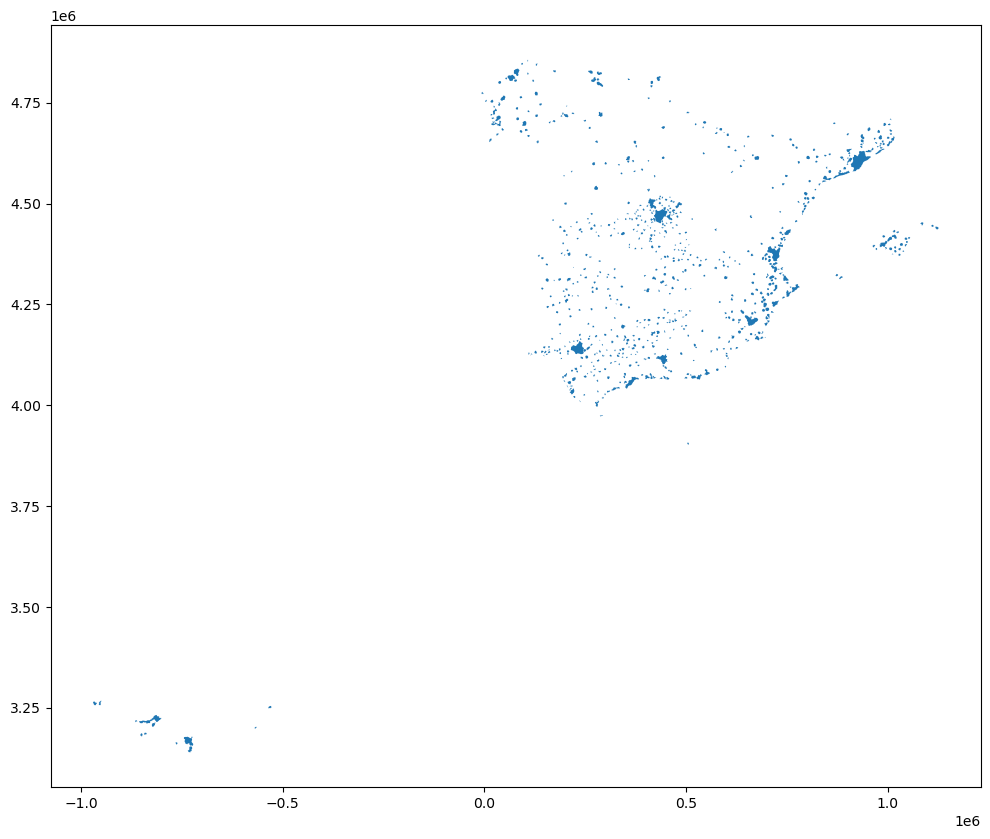

In [ ]:
# Setup figure and axis with different size
f, ax = plt.subplots(1, figsize=(12, 12))
# Add layer of polygons on the axis
cities.plot(ax=ax)
# Display
plt.show()

### 修改边框

边界线有时会扭曲或妨碍对地图的正确解释。在这些情况下，了解如何修改它们很有用。虽然不太复杂，但在`geopandas`中访问边界的方式并不像地图的其他方面（例如大小或框架）那样简单。让我们首先查看使*行更粗*和*黑色*的代码，然后我们将完成不同的步骤：

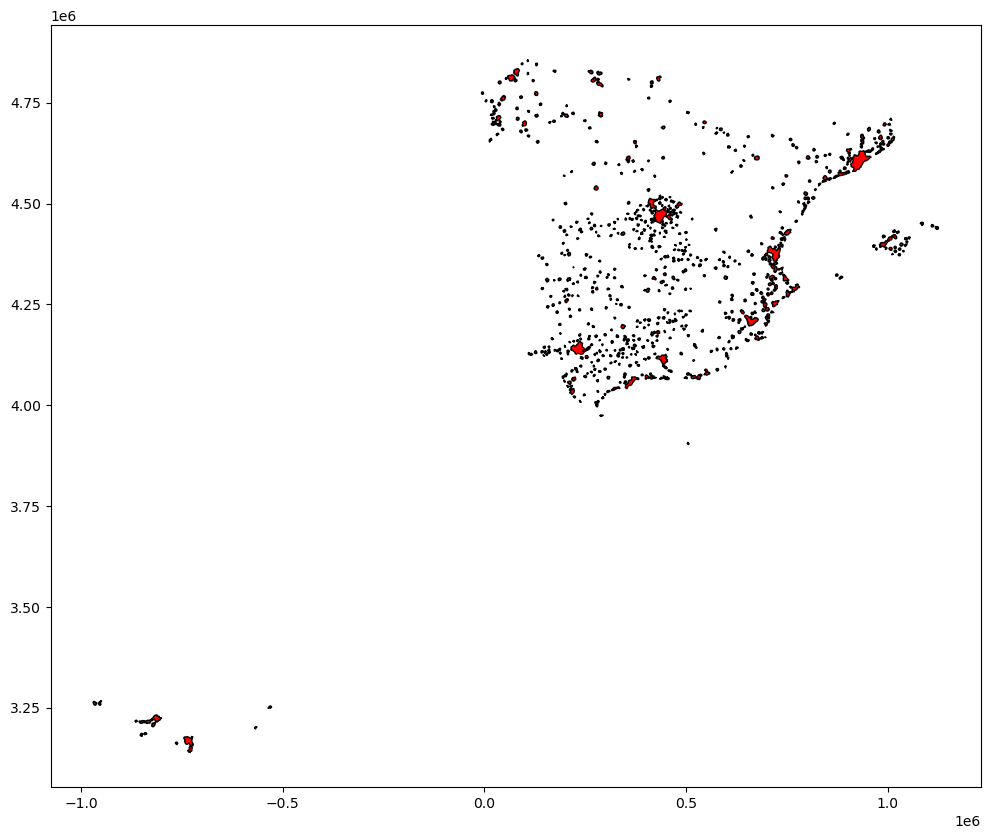

In [ ]:
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(12, 12))
# Add layer of polygons on the axis, set fill color (`facecolor`) and boundary
# color (`edgecolor`)
cities.plot(
    linewidth=1, 
    facecolor='red', 
    edgecolor='black', 
    ax=ax
);

请注意线条如何粗。此外，所有多边形都以相同的（默认）颜色着色，即浅红色。但是，由于线条较粗，因此我们只能看到面积足够大的那些城市的面填充。

让我们逐行检查我们在代码片段中所做的工作：

* 我们首先创建图形（`f`）对象和其中的一个轴（`ax`），我们将在其中绘制地图。
* 然后，我们像往常一样调用`plot`，但传入两个新参数：线宽表示线宽;`facecolor`，用于控制每个多边形填充的颜色;和`边色`，以控制边界的颜色。

此方法与其他几何图形（如直线）的工作方式非常相似。例如，如果我们想用红色绘制街道，我们只需：

<AxesSubplot: >

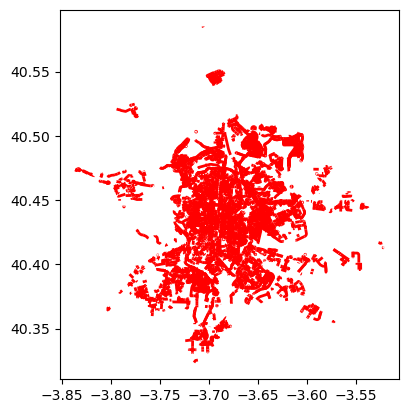

In [ ]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add layer with lines, set them red and with different line width
# and append it to the axis `ax`
streets.plot(linewidth=2, color='red', ax=ax)

重要提示，请注意，在线条的情况下，控制颜色的参数只是`颜色`。这是因为线条没有区域，因此无需区分主区域（`facecolor`）和边框线（`边缘颜色`）。

### 变换 CRS

坐标参考系统 （CRS） 是地理学家和制图员在二维平面（如一张纸或计算机屏幕）上表示三维对象（如圆形地球）的方式。如果源数据包含有关数据 CRS 的信息，我们可以在`GeoDataFrame`中对其进行修改。特别是，如果我们有多个数据集应该一起分析或绘制，它们需要位于同一个 CRS 中。

In [ ]:
print(cities.crs.to_epsg())
print(streets.crs.to_epsg())
print(pois.crs.to_epsg())

25830
4326
4326


In [ ]:
cities.crs

<Derived Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.01, 80.49)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

如我们所见，存储了有关参考系统的信息：它使用标准的西班牙投影，以米表示。还有其他不太可破译的参数，但我们现在不需要担心它们。

如果我们想修改它并将多边形“重新投影”到不同的 CRS 中，最快的方法是在线查找 [EPSG](https://en.wikipedia.org/wiki/International_Association_of_Oil_%26_Gas_Producers#European_Petroleum_Survey_Group) 代码（[epsg.io](http://epsg.io/)是一个很好的代码，尽管还有其他代码）。例如，如果我们想将数据集转换为纬度/纬度坐标，我们将使用其 EPSG 代码 4326：

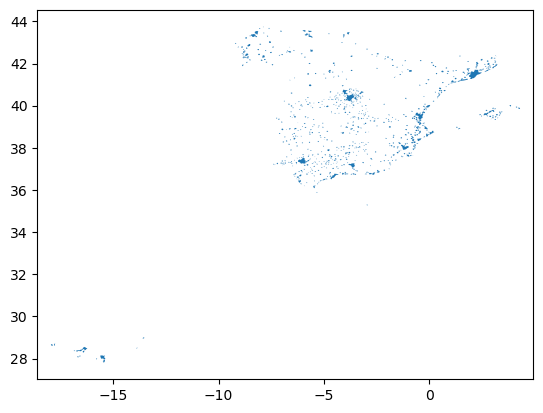

In [ ]:
# Reproject (`to_crs`) and plot (`plot`) polygons
cities.to_crs(epsg=4326).plot()
# Set equal axis
lims = plt.axis('equal')

多边形的形状略有不同。此外，请注意绘制它们的*比例*有何不同。

## 合成多层地图

到目前为止，我们已经考虑了绘制*单个*数据层的许多方面。但是，在许多情况下，有效的地图需要多个：例如，我们可能希望在社区的多边形顶部显示街道，并为要突出显示的特定位置添加几个点。GIS 的核心是可以通过将来自不同来源的空间信息叠加在一起来组合它，这在 Python 中完全支持。

在本节中，让我们从 `cities`表中仅选择马德里并将其转换为纬度/纬度，使其与街道和 POI 图层对齐：

In [11]:
mad = cities.loc[[12], :].to_crs(epsg=4326)
mad

city_id  n_buildings                                           geometry
12   ci012       193714  POLYGON ((-3.90016 40.30421, -3.90019 40.30457...

在一张地图上组合不同的图层归结为以顺序将它们中的每一个添加到同一轴上，就好像我们实际上是在前一个图层之上叠加一个图层一样。例如，让我们绘制马德里及其条形的边界：

<AxesSubplot: >

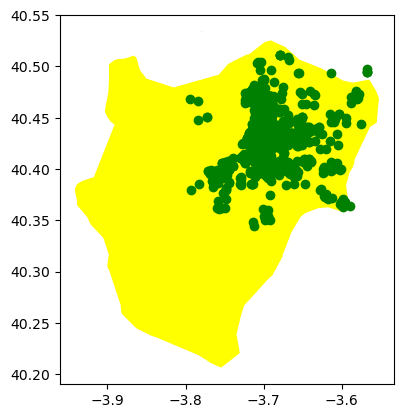

In [14]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygon on to axis `ax`
mad.plot(ax=ax, color="yellow")
# Add a layer with lines on top in axis `ax`
pois.plot(ax=ax, color="green")

## 将地图保存为图形

一旦我们制作了我们满意的地图，我们可能希望将其保存到文件中，以便我们可以将其包含在报告、文章、网站等中。在 Python 中导出映射涉及将代码块末尾的 `plt.show`替换为 `plt.savefig`，以指定保存它的位置和方式。例如，要将以前的地图保存到托管笔记本的同一文件夹中的`png`文件中：

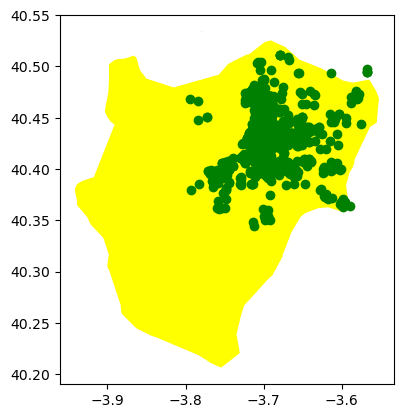

In [ ]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygon on to axis `ax`
mad.plot(ax=ax, color="yellow")
# Add a layer with lines on top in axis `ax`
pois.plot(ax=ax, color="green")
# Save figure to a PNG file
plt.savefig('madrid_bars.png')

如果您现在检查该文件夹，您会发现带有地图的`png`（图像）文件。

命令`plt.savefig`包含大量选项和要调整的其他参数。鉴于创建的图形的大小不是很大，我们可以使用参数`dpi`来增加它，它代表`每英寸点数`，它是图像分辨率的标准度量。例如，对于高质量的图像，我们可以使用 500：

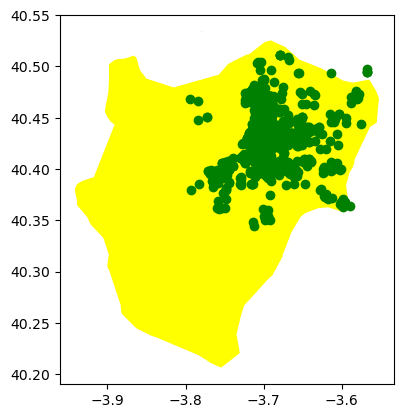

In [ ]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygon on to axis `ax`
mad.plot(ax=ax, color="yellow")
# Add a layer with lines on top in axis `ax`
pois.plot(ax=ax, color="green")
# Save figure to a PNG file
plt.savefig('madrid_bars.png', dpi=500)

## 操作空间表 (`GeoDataFrames`)

一旦我们了解了如何直观地显示包含的空间信息，让我们看看如何将其与上一个会话中学到的有关操作非空间表格数据的操作相结合。从本质上讲，关键是要认识到`GeoDataFrame`将其大部分空间信息包含在名为`几何`的单个列中，但其余部分的外观和行为与非空间`数据帧`完全相同（事实上，它是）。

`GeoDataFrame`内置了一系列传统的GIS操作。在这里，我们将浏览其中的一小部分，其中包含一些最常用的子集。

### 面积计算

我们经常需要从多边形中获得的空间方面之一是它们的面积。“它有多大？”当我们想到国家、地区或城市时，这个问题总是困扰着我们。要获取面积测量值，首先要确保投影`GeoDataFrame`。如果是这种情况，您可以按如下方式计算面积：

In [ ]:
city_areas = cities.area
city_areas.head()

0    8.449666e+06
1    9.121270e+06
2    1.322653e+07
3    6.808121e+07
4    1.072284e+07
dtype: float64

这表明我们表中第一个城市的面积为8，450，000平方米。如果我们想换算成平方公里，我们可以除以 1，000，000：

In [ ]:
areas_in_sqkm = city_areas / 1000000
areas_in_sqkm.head()

0     8.449666
1     9.121270
2    13.226528
3    68.081212
4    10.722843
dtype: float64

### 长度

同样，线条的一个同样常见的问题是它们的长度。同样，它们的计算在 Python 中相对简单，前提是我们的数据是投影的。在这里，我们将同时执行投影（`to_crs`）和长度计算：

In [ ]:
street_length = streets.to_crs(epsg=25830).length
street_length.head()

0    120.776840
1    120.902920
2    396.494357
3    152.442895
4    101.392357
dtype: float64

由于我们使用的CRS（`EPSG：25830`）以米表示，因此我们可以判断第一个街段约为37米。

### 质心计算

有时，将多边形汇总为单个点很有用，为此，一个很好的候选对象是它的质心（几乎就像平均值的空间模拟）。以下命令将返回一个`GeoSeries`（包含空间数据的单列），其中包含多边形`GeoDataFrame`的质心：

In [ ]:
cents = cities.centroid
cents.head()

0    POINT (386147.759 4204605.994)
1    POINT (216296.159 4579397.331)
2    POINT (688901.588 4180201.774)
3    POINT (518262.028 4069898.674)
4    POINT (206940.936 4127361.966)
dtype: geometry

请注意， `cents`不是整个表，而是单个列或 `GeoSeries`对象。这意味着您可以直接绘制它，就像绘制表格一样：

<AxesSubplot: >

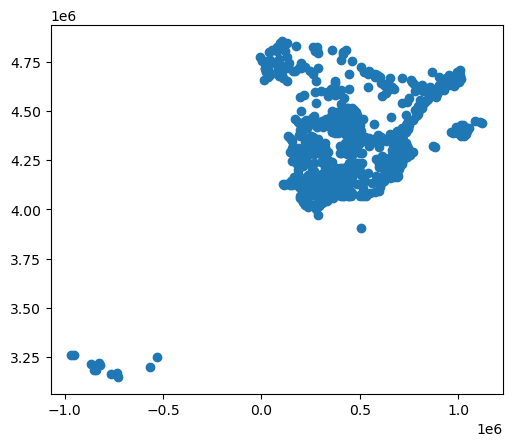

In [ ]:
cents.plot()

但是，您无需调用`geometry`列来检查空间对象。事实上，如果你这样做会返回一个错误，因为没有任何`geometry`列，对象`geometry`本身就是几何。

### 多边形中的点 (PiP)

从概念上讲，知道点是否在多边形内是一项简单的练习，但在计算上是一项棘手的任务。在`GeoPandas`中执行此操作的方法是通过`contains`方法，该方法可用于每个多边形对象。

In [ ]:
poly = cities.loc[12, "geometry"]
pt1 = cents[0]
pt2 = cents[12]

我们可以按如下方式执行检查：

In [ ]:
poly.contains(pt1)

False

In [ ]:
poly.contains(pt2)

True

出于教学原因，以这种方式执行面中的点具有指导意义且有用，但对于具有许多点和面的情况，它不是特别有效。在这些情况下，更可取的做法是作为“空间连接”执行。如果您对这些感兴趣，请参阅此链接以了解有关它们的更多信息：
https://geopandas.org/en/stable/docs/user_guide/mergingdata.html#spatial-joins

### 缓冲区

缓冲区是经典的 GIS 操作之一，其中在给定特定辐射的情况下围绕特定几何绘制区域。例如，与面中点操作结合使用以计算可达性、集水区等，这些非常有用。

在本例中，我们将使用条形表，但将其投影到与`城市`相同的 CRS，因此以米表示：

In [ ]:
pois_projected = pois.to_crs(cities.crs)
pois_projected.crs

<Derived Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°W and 0°W: Faroe Islands offshore; Ireland - offshore; Jan Mayen - offshore; Norway including Svalbard - offshore; Spain - onshore and offshore.
- bounds: (-6.0, 35.26, 0.01, 80.49)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

To create a buffer using `geopandas`, simply call the `buffer` method, passing in the radious. For example, to draw a 500m. buffer around every bar in Madrid:

In [ ]:
buf = pois_projected.buffer(500)
buf.head()

0    POLYGON ((440085.759 4475244.528, 440083.352 4...
1    POLYGON ((441199.443 4482099.370, 441197.035 4...
2    POLYGON ((440012.154 4473848.877, 440009.747 4...
3    POLYGON ((441631.862 4473439.094, 441629.454 4...
4    POLYGON ((441283.067 4473680.493, 441280.659 4...
dtype: geometry

而绘制它同样是粗暴的：

<AxesSubplot: >

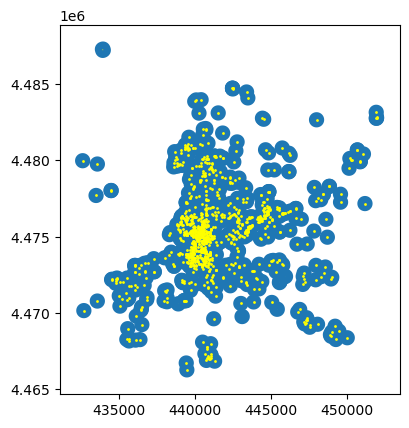

In [ ]:
f, ax = plt.subplots(1)
# Plot buffer
buf.plot(ax=ax, linewidth=0)
# Plot named places on top for reference
# [NOTE how we modify the dot size (`markersize`)
# and the color (`color`)]
pois_projected.plot(ax=ax, markersize=1, color='yellow')

## 从 Web 源添加基础图层

许多单个数据集在单独显示时缺乏上下文。缓解此问题的常用方法是使用 Web 切片，这是一种快速获取地理环境以呈现空间数据的方法。在 Python 中，我们可以使用 ['contextily'](https://contextily.readthedocs.io)来下拉磁贴并将它们与我们自己的地理数据一起显示。

我们可以先以与正常方式相同的方式创建地图，然后使用`add_basemap`命令添加底图：

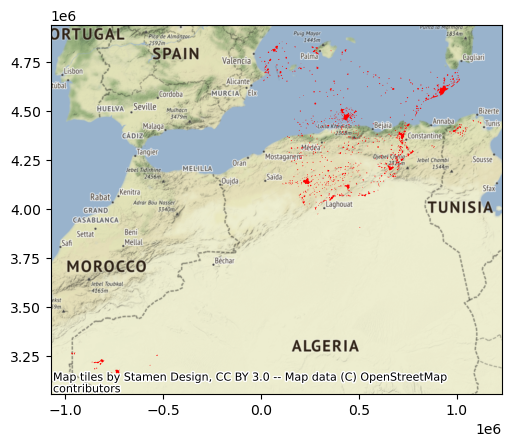

In [8]:
ax = cities.plot(color="red")
cx.add_basemap(ax);

哎呀，出事了！让我们修复它：

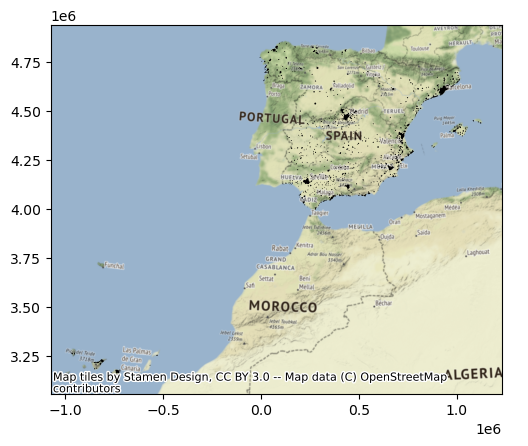

In [6]:
ax = cities.plot(color="black")
cx.add_basemap(ax, crs=cities.crs);

在添加底图以声明表示数据的坐标参考系 （`crs`） 时，我们需要明确，否则“上下文”将无法拾取它。相反，我们可以将数据的 CRS 更改为 [伪墨卡托](http://epsg.io/3857)，这是大多数 Web 切片的原生参考系统：

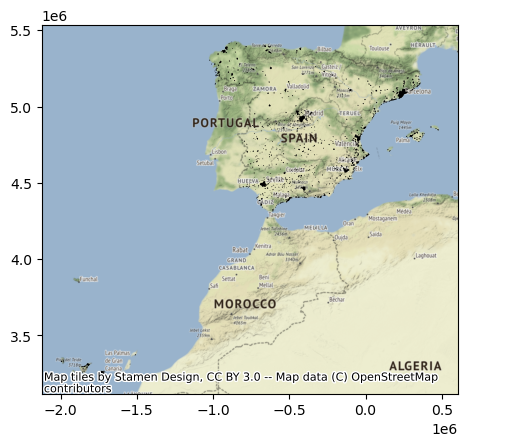

In [7]:
cities_wm = cities.to_crs(epsg=3857)
ax = cities_wm.plot(color="black")
cx.add_basemap(ax);

请注意坐标的不同之处，但是，如果我们设置正确，这两种方法都可以很好地对齐图块和数据。

Web 切片可以以类似于我们上面看到的方式与地图的其他功能集成。因此，例如，我们可以更改地图的大小，并删除轴。让我们用马德里作为这个例子：

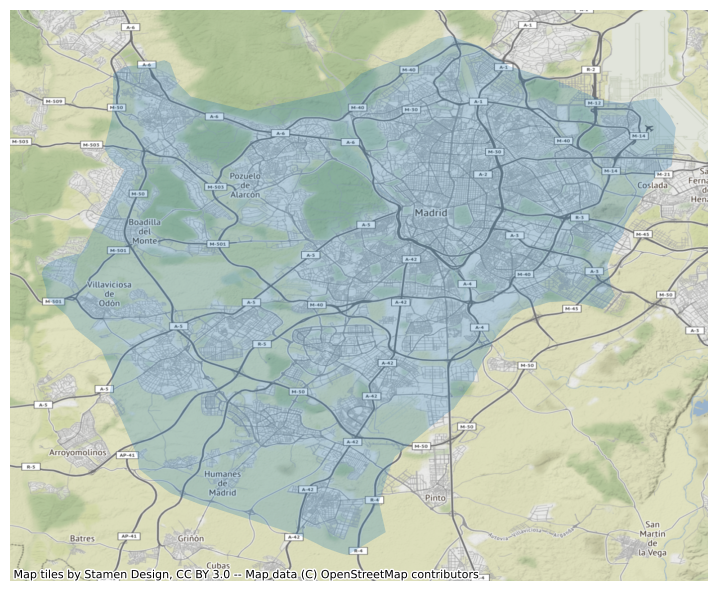

In [15]:
f, ax = plt.subplots(1, figsize=(9, 9))
mad.plot(alpha=0.25, ax=ax)
cx.add_basemap(ax, crs=mad.crs)
ax.set_axis_off()

现在，`contextily`在可用于创建底图的源和提供者方面提供了许多选项。例如，我们可以改用卫星图像：

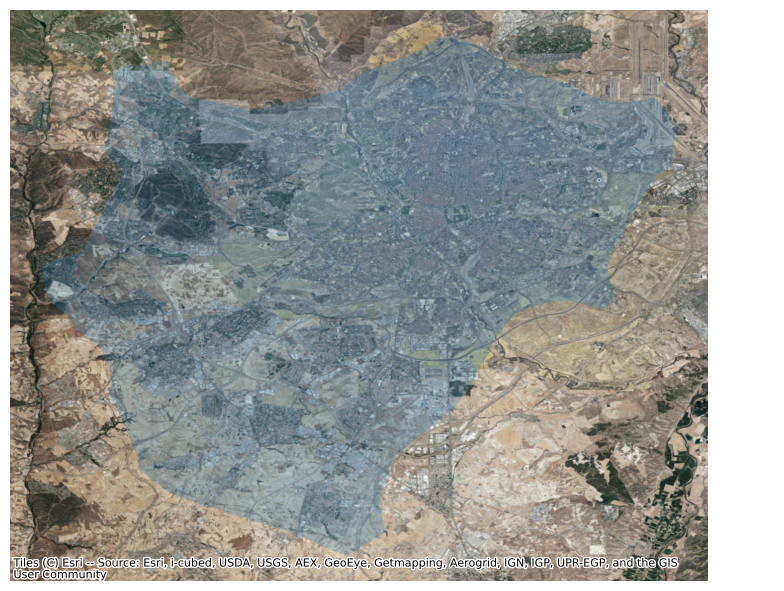

In [16]:
f, ax = plt.subplots(1, figsize=(9, 9))
mad.plot(alpha=0.25, ax=ax)
cx.add_basemap(
    ax, 
    crs=mad.crs,
    source=cx.providers.Esri.WorldImagery
)
ax.set_axis_off()

看看这个推特帖子，以获得一些关于供应商的进一步想法：

In [17]:
from IPython.display import HTML
tweet = """
<blockquote class="twitter-tweet" data-lang="en"><p lang="et" dir="ltr">Terrain maps <a href="https://t.co/VtN9bGG5Mt">pic.twitter.com/VtN9bGG5Mt</a></p>&mdash; Dani Arribas-Bel (@darribas) <a href="https://twitter.com/darribas/status/1157297596689539072?ref_src=twsrc%5Etfw">August 2, 2019</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
"""
HTML(tweet)

并考虑查看该软件包的文档网站：

> [https://contextily.readthedocs.io/en/latest/](https://contextily.readthedocs.io/en/latest/)

# PART 2: 地图投影

**坐标参考系 （CRS）** 非常重要，因为 GeoDataFrame 中的几何形状只是任意空间中的坐标集合。CRS告诉Python这些坐标与地球上的地方有什么关系。**地图投影**（或投影坐标系）是将纬度和经度系统地转换为平原表面，其中单位通常表示为米（而不是十进制度）。此变换用于在平面二维地图上**表示三维地球**。

由于不同空间数据集中的 CRS 经常不同（即，一个数据集的坐标可能以十进制度定义，而另一个数据集的坐标以米为单位），因此将不同图层重新投影（转换）为通用 CRS 是一种常见的过程。在分析图层之间的空间关系时，图层必须位于同一坐标参考系统中，例如，在面中查询点或其他类型的叠加分析时。

为地图选择合适的投影并不总是那么简单，因为它取决于您实际想要用地图表示的内容以及数据的空间比例。事实上，没有一个单一的“完美投影”，因为它们中的每一个都有一些优点和缺点，您应该选择最适合您需求的投影。事实上，你选择的投影甚至可能会告诉你一些关于你的信息！
    
<img src="files/Map-projections.png">

*Source: XKCD, See a full comic about ["What your favorite map projection tells about you"](https://xkcd.com/977/)*.

有关如何选择地图投影的概述：
- https://www.amcharts.com/dataviz-tip-15-choose-map-projection/
- https://ubc-library-rc.github.io/map-projections/content/choosing-projection.html
 
这里还有一些不错的工具来掌握地图投影： https://geoawesomeness.com/5-tools-will-let-master-map-projections/  

## Distortions
Tissot's indicatrix通过向您展示圆在地图的不同部分如何变形来提供扭曲的视觉提示：https://en.wikipedia.org/wiki/Tissot's_indicatrix 
变形示例（墨卡托投影）：
<table>
    <tr><td><img src="files/distort01.jpg"></td><td><img src="files/distort02.png"></td></tr>
    </table>
Try out: https://mathigon.org/course/circles/spheres-cones-cylinders#sphere-maps

## 坐标参考系 (CRS) in Geopandas

幸运的是，使用 Geopandas 和名为 [pyproj](https://pyproj4.github.io/pyproj/stable/) 的库可以轻松定义和更改投影。 在本教程中，我们将看到**如何检索来自数据的坐标参考系统信息，以及如何将数据重新投影到另一个 crs**。 我们将从重新投影数据文件WGS84（纬度、经度坐标）转换为兰伯特方位角等面积投影，这是 [推荐的投影欧洲](http://mapref.org/LinkedDocuments/MapProjectionsForEurope-EUR-20120.pdf) 由欧盟委员会提供。

在本教程中，我们将使用一个名为`Europe_borders.shp`的 Shapefile 代表欧洲的国家边界，您应该已经[在上一个教程中下载](geopandas-basics.ipynb) 到“L2_data”文件夹中。

在 Shapefile 中，有关坐标参考系统的信息存储在 .prj 文件中。 如果缺少此文件，您可能会遇到麻烦！ 当使用 Geopandas 将数据读入`GeoDataFrame`时，crs 信息会自动存储到 GeoDataFrame 的`.crs`属性中。

让我们从`Europe_borders.shp`文件中读取数据并检查`crs`开始：

In [18]:
# Read the file
fp = "files/Europe_borders/Europe_borders.shp"
data = gpd.read_file(fp)

In [19]:
# Check the coordinate reference system
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

我们在这里看到的实际上是来自 pyproj 模块的 CRS 对象。

EPSG 编号（以 *European Petroleum Survey Group* 命名）是一个代码，用于说明数据集的坐标系。 [EPSG Geodetic Parameter Dataset](http://www.epsg.org/) 是坐标参考系统和坐标变换定义的集合，在应用中可能是全球的、区域的、国家的或地方的。

我们的geodataframe的EPSG代码是`4326`，它指的是WGS84坐标系（我们也可以通过查看经度和纬度十进制度的坐标值来计算）。

您可以从以下位置找到大量信息和可用坐标参考系统的列表：

  - [www.spatialreference.org](http://spatialreference.org/)
  - [www.proj4.org](https://proj4.org/operations/projections/)
  - [www.mapref.org](http://mapref.org/CollectionofCRSinEurope.html)

- 让我们继续检查 `geometry` 列中的值，以验证 GeoDataFrame 的 CRS 是否正确：

In [20]:
data['geometry'].head()

0    POLYGON ((8.45778 54.56236, 8.44953 54.56269, ...
1    POLYGON ((8.71992 47.69664, 8.72092 47.69530, ...
2    POLYGON ((6.73317 53.57409, 6.73017 53.57542, ...
3    POLYGON ((6.85822 53.59411, 6.85592 53.59550, ...
4    POLYGON ((6.89894 53.62561, 6.88439 53.62814, ...
Name: geometry, dtype: geometry

正如我们所看到的，Polygons 的坐标值确实看起来像纬度和经度值，因此一切似乎都是有序的。

WGS84 投影并不是真正适合在地图上表示欧洲边界的投影（区域会变形），所以让我们将这些几何图形转换为兰伯特方位角等面积投影 ([EPSG: 3035](http://spatialreference.org/ref/epsg/etrs89-etrs-laea/))这是欧洲委员会推荐的投影。

更改投影很容易 [在 Geopandas 中](https://geopandas.org/en/stable/docs/user_guide/projections.html#re-projecting) 使用内置的 `.to_crs()` 函数 在 GeoDataFrame 的功能中。 该函数有两个可选参数 1) `crs` 和 2) `epgs`，可用于进行坐标转换并将数据重新投影到您要使用的 CRS 中。

- 让我们使用 `epsg` 参数将我们的数据重新投影到 `EPSG 3035` 中：

In [21]:
# Let's make a backup copy of our data
data_wgs84 = data.copy()

# Reproject the data
data = data.to_crs(epsg=3035)

In [22]:
# Check the new geometry values
data['geometry'].head()

0    POLYGON ((4221214.558 3496203.404, 4220681.651...
1    POLYGON ((4224860.478 2732279.320, 4224932.819...
2    POLYGON ((4104652.176 3390034.953, 4104460.401...
3    POLYGON ((4113025.664 3391895.756, 4112879.943...
4    POLYGON ((4115871.228 3395282.099, 4114921.348...
Name: geometry, dtype: geometry

我们开始了，几何中的坐标值已经改变了！ 现在我们已经成功地将图层的投影更改为一个新图层，即“ETRS-LAEA”投影。

要真正了解正在发生的事情，最好直观地探索我们的数据。 让我们比较数据集映射出它们。


In [23]:
data_wgs84.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
data.crs

<Derived Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Europ

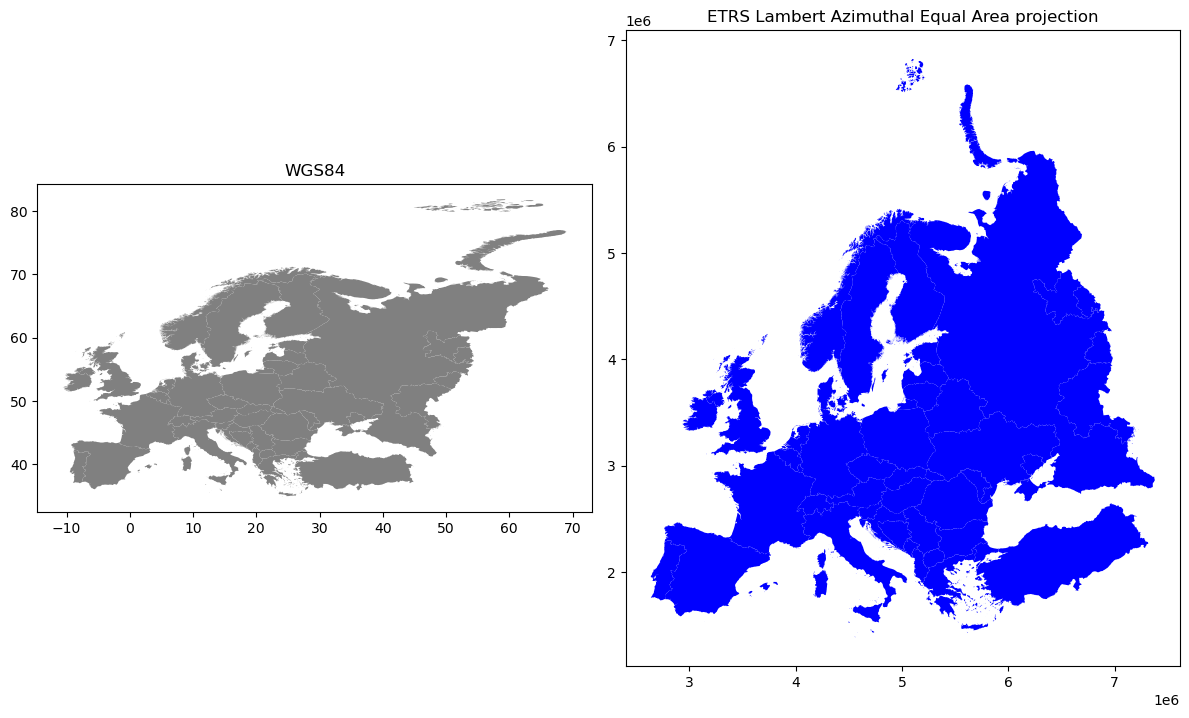

In [25]:
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

# Plot the data in WGS84 CRS
data_wgs84.plot(ax=ax1, facecolor='gray')

# Add title
ax1.set_title("WGS84")

# Plot the one with ETRS-LAEA projection
data.plot(ax=ax2, facecolor='blue')

# Add title
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection")

# Set aspect ratio as 1
ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)

# Remove empty white space around the plot
plt.tight_layout()

事实上，这些地图看起来很不一样，重新投影的地图在欧洲看起来好多了，因为尤其是北部地区更真实，不像 WGS84 中那样拉伸。

最后，让我们将投影图层保存到 Shapefile 中，以便我们稍后使用它。 请注意，即使 crs 信息存储在 .prj 文件中，在文件名中也包含 crs 信息可能是个好主意：

In [26]:
# Save to disk
data.to_file("Europe_borders_epsg3035.shp")

## 处理不同的 CRS 格式

有多种方式来呈现坐标参考系统信息，例如 [PROJ 字符串](https://proj.org/usage/quickstart.html)、`EPSG 代码`、`Well-Known-Text (WKT)`、` JSON`。 在处理从不同来源获得的空间数据时，您很可能会遇到其中一些问题。 时不时地需要能够将 CRS 信息从一种格式转换为另一种格式，因此，了解一些如何执行此操作的技巧很有用。

幸运的是，使用 [pyproj](https://pyproj4.github.io/pyproj/stable/) 库在 Python 中处理 CRS 信息很容易。 事实上，`pyproj` 是一个名为 [PROJ](https://proj.org/)（由 [OSGeo](https://www.osgeo.org/) 社区维护）的软件的 Python 包装器，它是 广泛用于在各种 GIS 软件中进行坐标转换的工具。 `Pyproj` 也在 Geopandas 的底层使用，它处理所有 CRS 定义和坐标转换（像我们之前所做的那样从 CRS 重新投影到另一个）。

### 概述

以下代码单元打印出使用 pyproj CRS 表示 crs 信息的不同方式的摘要。 在这里，我们使用原始欧洲边界层的 crs 作为起点：

In [27]:
### Import CRS class from pyproj
from pyproj import CRS

In [28]:
# PROJ dictionary:
crs_dict = data_wgs84.crs

# pyproj CRS object:
crs_object = CRS(data_wgs84.crs)

# EPSG code (here, the input crs information is a bit vague so we need to lower the confidence threshold)
crs_epsg = CRS(data_wgs84.crs).to_epsg(min_confidence=25)

# PROJ string
crs_proj4 = CRS(data_wgs84.crs).to_proj4()

# Well-Known Text (WKT)
crs_wkt = CRS(data_wgs84.crs).to_wkt()

d:\work\miniconda3\envs\ox\Lib\site-packages\pyproj\crs\crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [29]:
print("PROJ dictionary:\n", crs_dict)
print("\nCRS object:\n", crs_object)
print("\nEPSG code: \n", crs_epsg)
print("\nPROJ string: \n", crs_proj4)
print("\nWell-Known Text (WKT):\n",crs_wkt) 

PROJ dictionary:
 epsg:4326

CRS object:
 GEOGCRS["WGS 84",ENSEMBLE["World Geodetic System 1984 ensemble",MEMBER["World Geodetic System 1984 (Transit)"],MEMBER["World Geodetic System 1984 (G730)"],MEMBER["World Geodetic System 1984 (G873)"],MEMBER["World Geodetic System 1984 (G1150)"],MEMBER["World Geodetic System 1984 (G1674)"],MEMBER["World Geodetic System 1984 (G1762)"],MEMBER["World Geodetic System 1984 (G2139)"],ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[2.0]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["Horizontal component of 3D system."],AREA["World."],BBOX[-90,-180,90,180]],ID["EPSG",4326]]

EPSG code: 
 4326

PROJ string: 
 +proj=longlat +datum=WGS84 +no_defs +type=crs

Well-Known Text (WKT):
 GEOGCRS["WGS 84",ENSEMBLE["Wor

### Pyproj CRS 对象

接下来，让我们看看如何轻松地从 CRS 中提取有用的信息，并将 CRS 信息从一种格式转换为另一种格式。 `pyproj` -library 有一个名为 [CRS](https://pyproj4.github.io/pyproj/dev/api/crs.html)，它提供了许多处理 CRS 信息的有用功能。

In [30]:
# Let's see the current CRS of our data
print(data.crs)

epsg:3035


使用 print() 语句打印 crs 为我们提供了 EPSG 代码。

但是，让我们看看相同的信息在其他格式（例如“WKT”或“Proj4”文本）中的样子。 为此，我们需要使用“CRS”类。

<div class="alert alert-info">

**Note**
    
以下示例已经过测试，可与“pyproj”版本“2.6.1”和“geopandas”版本“0.8.1”一起使用。 您可以通过运行 conda list 命令来检查包版本。
   
</div>

In [31]:
# Initialize the CRS class for epsg code 3035:
crs_object = CRS.from_epsg(3035)
crs_object

<Derived Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Europ

正如我们所见，“CRS”对象包含有关坐标参考系统的信息，例如 CRS 的“名称”（ETRS89/LAEA Europe）、使用 CRS 的“区域”（*Europe* with bounds *(-16.1, 32.88, 40.18, 84.17)*), and the `Datum` (European Terrestrial Reference System 1989).

我们也可以很容易地单独解析这些信息，如下所示：

In [32]:
# Name
print("Name:", crs_object.name)

# Coordinate system
print("Coordinate system:", crs_object.coordinate_system)

# Bounds of the area where CRS is used
print("Bounds:", crs_object.area_of_use.bounds)

Name: ETRS89-extended / LAEA Europe
Coordinate system: cartesian
Bounds: (-35.58, 24.6, 44.83, 84.73)


您可以通过键入“crs_object.”并按制表符来探索可以从 CRS 中提取的所有可能信息。

让我们看看如何将 crs 信息从一种格式转换为另一种格式。 了解 CRS 的 EPSG 代码通常很有用。 接下来，我们将进行一些转换来演示 `CRS` 类的功能。

In [33]:
# Retrieve CRS information in WKT format
crs_wkt = crs_object.to_wkt()
print(crs_wkt)

PROJCRS["ETRS89-extended / LAEA Europe",BASEGEOGCRS["ETRS89",ENSEMBLE["European Terrestrial Reference System 1989 ensemble",MEMBER["European Terrestrial Reference Frame 1989"],MEMBER["European Terrestrial Reference Frame 1990"],MEMBER["European Terrestrial Reference Frame 1991"],MEMBER["European Terrestrial Reference Frame 1992"],MEMBER["European Terrestrial Reference Frame 1993"],MEMBER["European Terrestrial Reference Frame 1994"],MEMBER["European Terrestrial Reference Frame 1996"],MEMBER["European Terrestrial Reference Frame 1997"],MEMBER["European Terrestrial Reference Frame 2000"],MEMBER["European Terrestrial Reference Frame 2005"],MEMBER["European Terrestrial Reference Frame 2014"],ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[0.1]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4258]],CONVERSION["Europe Equal Area 2001",METHOD["Lambert Azimuthal Equal Area",ID["EPSG",9820]],PARAMETER["Latitude of natural origin",52,ANGL

正如我们所见，`WKT` 格式包含*很多*信息。 通常，例如 Shapefile 的 .prj 文件包含这种格式的信息。 让我们看看如何从中提取 EPSG 代码。 为此，我们需要重新初始化 CRS 对象，这次是从“WKT”文本表示。

In [34]:
# Retrieve EPSG code from WKT text
epsg = CRS(crs_wkt).to_epsg()
print(epsg)

3035


<div class="alert alert-info">

**无法识别 epsg?**
    
有时 `to_epsg()` 无法从 WKT 表示中识别 EPSG 代码。 如果 WKT 信息缺少一些细节，就会发生这种情况。 幸运的是，我们可以轻松调整匹配 CRS 信息和 EPSG 代码的最低置信度。 我们可以通过在调用函数时调整参数 min_confidence 来做到这一点。 默认情况下，置信度为 70%，但也可以设置较低的置信度阈值。
    
我们输入的 shapefile 的坐标信息不完整，默认设置不会产生 epsg 值：但是，CRS 能够确定具有较低置信度阈值的 EPSG 值：
    
```
# Let's try to extract the EPSG code from the crs of our original data:
CRS(data.crs).to_epsg()
>>> None
    
# Let's try it again with a lower confidence requirement (25 %)
CRS(data.crs).to_epsg(min_confidence=25)
>>> 3035
```
但是，使用它时要小心，因为从“奇异”坐标参考系统猜测 EPSG 也可能会提供错误的结果。
</div>

Let's now save our data to disk using the `WKT` format as the crs of our GeoDataFrame. WKT is a [preferred output format](https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems) when storing crs information as text.

In [35]:
# Re-define the CRS of the input GeoDataFrame 
data.crs = CRS.from_epsg(3035).to_wkt()

In [36]:
print(data.crs)

PROJCRS["ETRS89-extended / LAEA Europe",BASEGEOGCRS["ETRS89",ENSEMBLE["European Terrestrial Reference System 1989 ensemble",MEMBER["European Terrestrial Reference Frame 1989"],MEMBER["European Terrestrial Reference Frame 1990"],MEMBER["European Terrestrial Reference Frame 1991"],MEMBER["European Terrestrial Reference Frame 1992"],MEMBER["European Terrestrial Reference Frame 1993"],MEMBER["European Terrestrial Reference Frame 1994"],MEMBER["European Terrestrial Reference Frame 1996"],MEMBER["European Terrestrial Reference Frame 1997"],MEMBER["European Terrestrial Reference Frame 2000"],MEMBER["European Terrestrial Reference Frame 2005"],MEMBER["European Terrestrial Reference Frame 2014"],ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[0.1]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4258]],CONVERSION["Europe Equal Area 2001",METHOD["Lambert Azimuthal Equal Area",ID["EPSG",9820]],PARAMETER["Latitude of natural origin",52,ANGL

In [ ]:
# Save to disk
#data.to_file("Europe_borders_epsg3035.shp")

That's it. 


**HINT**: 名为 [PyCRS](https://github.com/karimbahgat/PyCRS) 的模块也可以是有用的库，因为它包含信息并支持许多不同的坐标参考定义，例如 OGC WKT (v1)、ESRI WKT、Proj4 和 spatialreference.org 提供的任何 EPSG、ESRI 或 SR-ORG 代码。

## 全球地图投影

最后，让我们玩一下全球地图投影:) `L2_data` 文件夹包含一个代表世界国家边界的图层 `ne_110m_admin_0_countries.shp`。 数据是从 https://www.naturalearthdata.com/ 下载的。

#### Check your understanding

<div class="alert alert-info">

    
读取全球数据集并绘制三张具有不同投影的地图！ 请参阅提示和投影定义：
    
- http://geopandas.org/projections.html
- https://pyproj4.github.io/pyproj/dev/api/crs.html
- https://spatialreference.org/
    
绘制地图时，请考虑不同世界地图投影的优缺点。
   
</div>


In [37]:
# Read in data
fp = "files/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp" 
admin = gpd.read_file(fp)

In [38]:
# Check input crs
admin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
# Set fig size
plt.rcParams['figure.figsize'] = [12, 6]

Text(0.5, 1.0, 'WGS84')

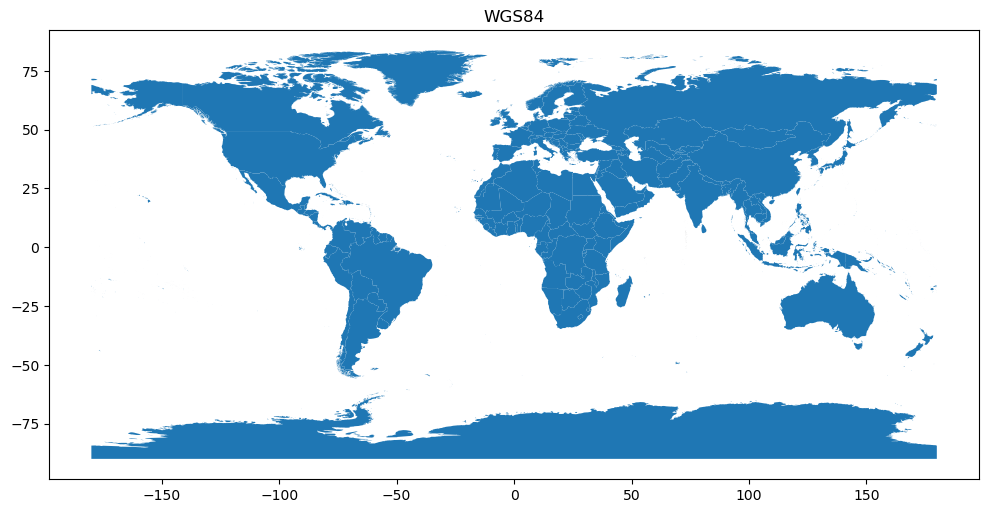

In [40]:
#Plot in original crs
admin.plot()
plt.title("WGS84")

Text(0.5, 1.0, 'Web mercator')

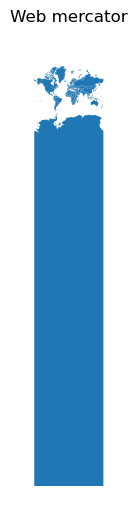

In [44]:
# Define projection as web mercator, 3785
web_mercator = CRS.from_epsg(3785)

# Re-project and plot
admin.to_crs(web_mercator).plot()

# Remove x and y axis
plt.axis('off')
plt.title("Web mercator")

Text(0.5, 1.0, 'Eckert IV')

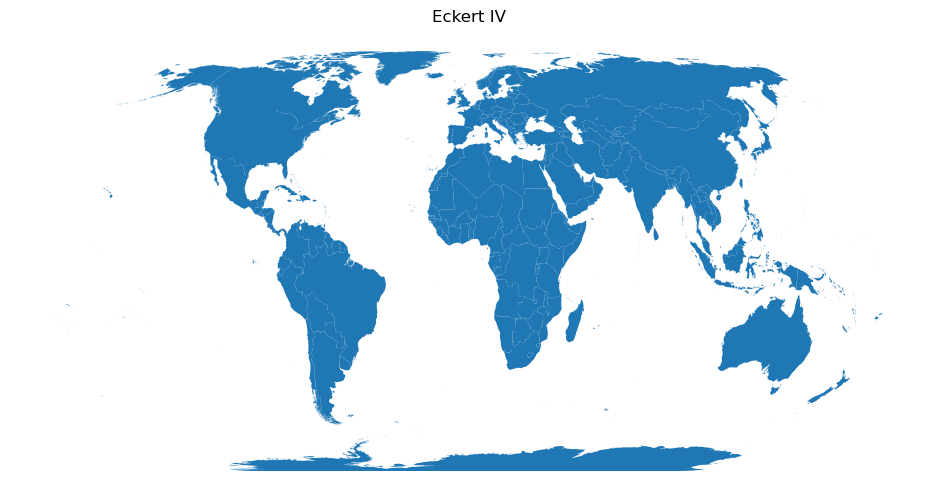

In [42]:
# Define projection Eckert IV from https://spatialreference.org/ref/esri/54012/
eckert_IV = CRS.from_proj4("+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

# Re-project and plot
admin.to_crs(eckert_IV).plot()

# Remove x and y axis
plt.axis('off')
plt.title("Eckert IV")

Text(0.5, 1.0, 'Orthographic')

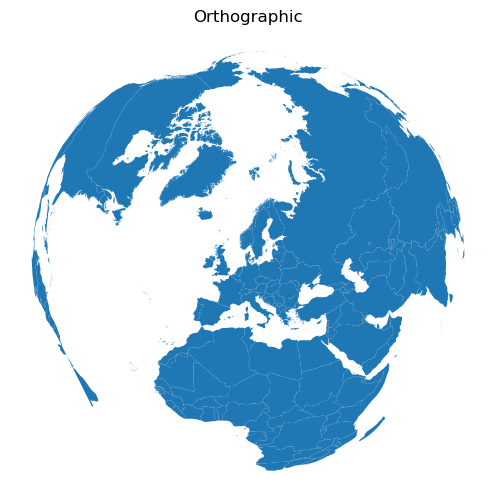

In [43]:
# Define an orthographic projection, centered in Denmark! from: http://www.statsmapsnpix.com/2019/09/globe-projections-and-insets-in-qgis.html
ortho = CRS.from_proj4("+proj=ortho +lat_0=56.3 +lon_0=9.5 +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs")

# Re-project and plot
admin.to_crs(ortho).plot()

# Remove x and y axis
plt.axis('off')
plt.title("Orthographic")

## 概括
就是这样！ 在本节中，我们学习了如何：

1. 使用 GeoPandas 中的 `to_crs()` 函数将几何图形从 crs 重新投影（转换）为另一个
2.使用`pyproj``CRS`定义不同格式的坐标参考系